#Modules

In [9]:
from pandas.core.common import random_state
import pandas as pd
import numpy as np
import gensim
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import spacy  # For preprocessing
import warnings
warnings.filterwarnings('ignore')
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


random_state=2022

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bow_data=pd.read_csv('/content/drive/MyDrive/NLP/bow_dataset.csv')
tf_idf_data=pd.read_csv('/content/drive/MyDrive/NLP/tfidf_dataset.csv')
# w2v_df=pd.read_csv('w2v_df.csv')
# d2v_df=pd.read_csv('d2v_df.csv')


In [4]:
bow_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1010,1011,1012,1013,1014,1015,1017,1019,1022,1023
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.166667,0.000000,0.192308,0.005571
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.187500,0.000000,0.038462,0.008959
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.019871,0.014965,0.5,0.520833,0.000000,0.000000,0.030561
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.000000,0.000000,0.029139
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.057143,0.000000,0.029139


In [6]:
dropped = ['Unnamed: 0']
data = bow_data.drop(dropped,axis=1)
bow_data=data

#bow

In [7]:
# y = np.ravel(data[806])

y = bow_data['1023']          #Target Variable
X = bow_data.drop('1023',1)   #Feature Matrix

# y.head()

In [8]:
#converted the dataframe

X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [11]:
model_rand = RandomForestRegressor()

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(x_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [12]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

AttributeError: ignored

In [13]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

In [14]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

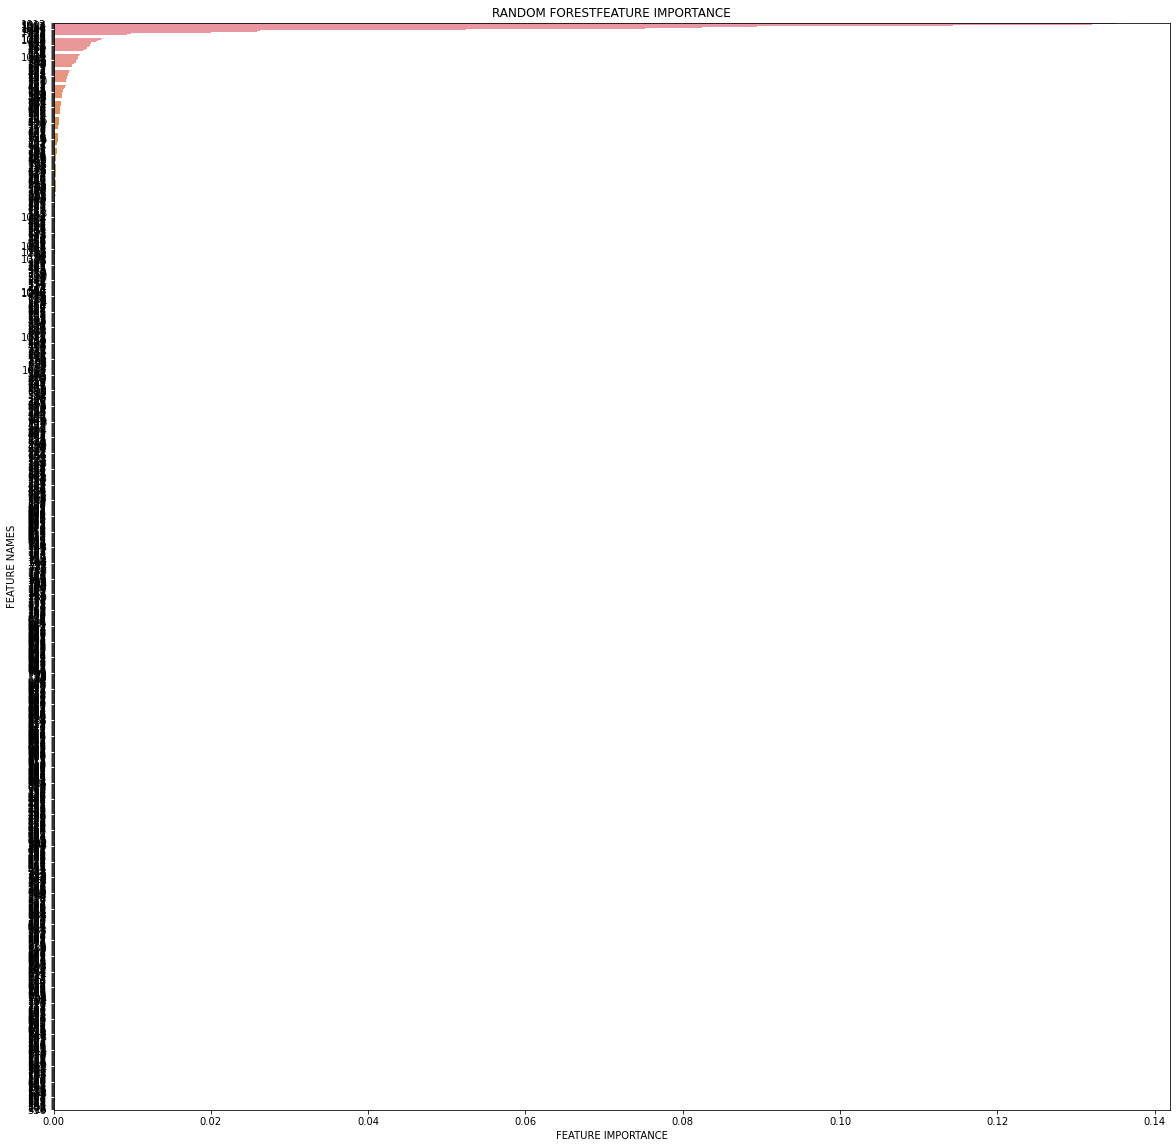

In [15]:
plot_feature_importance(rnd_clf.feature_importances_,x_train.columns,'RANDOM FOREST')

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2))
print()

RMSE: 0.046870
R2 Score: 0.511017



#tfid

In [16]:
tf_idf_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,834,835,836,837,838,839,841,843,846,847
0,0,0.0,0.0,0.0,0.0,0.147506,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.166667,0.000000,0.192308,0.005571
1,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001996,0.001209,1.0,0.187500,0.000000,0.038462,0.008959
2,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.019871,0.014965,0.5,0.520833,0.000000,0.000000,0.030561
3,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.000000,0.000000,0.029139
4,4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019871,0.014965,1.0,0.583333,0.057143,0.000000,0.029139


In [18]:
# y = np.ravel(data[806])

y = tf_idf_data['847']          #Target Variable
X = tf_idf_data.drop('847',1)   #Feature Matrix

# y.head()

In [19]:
#converted the dataframe

X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [21]:
model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(x_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [23]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

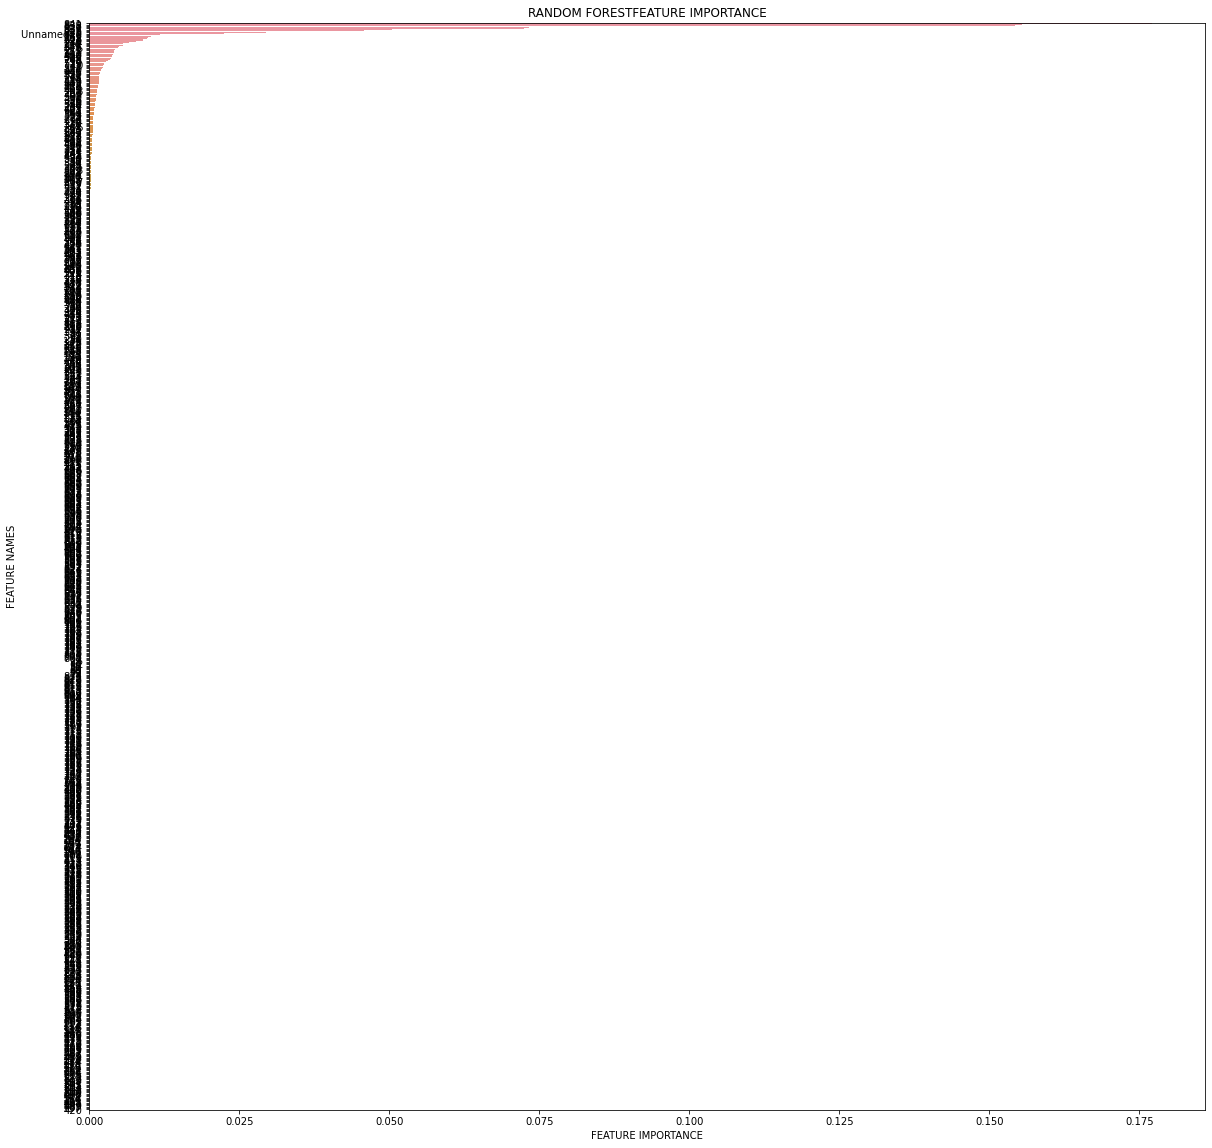

In [24]:
plot_feature_importance(rnd_clf.feature_importances_,x_train.columns,'RANDOM FOREST')

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2))
print()

RMSE: 0.044948
R2 Score: 0.549022



#w2v

In [ ]:
y = w2v_df['1003']          #Target Variable
X = w2v_df.drop('1003',1)   #Feature Matrix
X=pd.DataFrame(X)
y=pd.DataFrame(y)
for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_rand = RandomForestRegressor()

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 20, cv = 3, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
rnd_clf = RandomForestRegressor(n_estimators=100, min_samples_split=10 , min_samples_leaf=4, max_features='auto',max_depth=50,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

rmse_rnd = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse_rnd))

R2_rnd=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2_rnd))

RMSE: 375.182565
R2 Score: 0.462349


#d2v

In [ ]:
y = d2v_df['1203']          #Target Variable
X = d2v_df.drop('1203',1)   #Feature Matrix
X=pd.DataFrame(X)
y=pd.DataFrame(y)

for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_rand = RandomForestRegressor()

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 20, cv = 3, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
rnd_clf = RandomForestRegressor(n_estimators=100, min_samples_split=10 , min_samples_leaf=4, max_features='auto',max_depth=50,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

rmse_rnd = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse_rnd))

R2_rnd=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2_rnd))

RMSE: 270.750134
R2 Score: 0.389284
